# Análisis de opiniones de ropa de mujer de un sitio web

Primero, importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Creamos un DataFrame nuevo a partir de un archivo y comprobamos que es el correcto mostrando las primeras 10 líneas

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


Revisar el porcentaje de valores nulos en cada columna

In [3]:
(df.isnull().sum()/len(df)) * 100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

Revisar el tipo de dato que contiene cada columna para comprobar qué podemos hacer con cada uno. En este caso, por ejemplo, podemos ver que hay objetos (con strings de texto) y números con los que podremos realizar operaciones aritméticas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Clasificamos en variables las filas que contienen cada grupo de edad, mandamos llamar a las primeras 5 filas de una de ellas.

In [5]:
group1 = df[(df['Age'] >= 18) & (df['Age'] <= 29)]
group2 = df[(df['Age'] >= 30) & (df['Age'] <= 39)]
group3 = df[(df['Age'] >= 40) & (df['Age'] <= 49)]
group4 = df[(df['Age'] >= 50) & (df['Age'] <= 59)]
group5 = df[(df['Age'] >= 60) & (df['Age'] <= 69)]
group6 = df[(df['Age'] >= 70)]
group3.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
13,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates
15,15,1065,47,"Nice, but not for my body",I took these out of the package and wanted the...,4,1,3,General,Bottoms,Pants
17,17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses


Creamos dos variables: una con un arreglo de los nombres de grupos de edad y otra con un arreglo con el número de filas de cada dataframe.
Se hace un diccionario juntando los dos arreglos anteriores y creamos un dataframe a partir de éste.
Mostramos un gráfico de barras comparando la cantidad de usuarias en cada grupo de edad, donde el eje "x" corresponde al nombre asignado a cada grupo de edad y el eje "y" corresponde al número total de usuarias en cada uno.

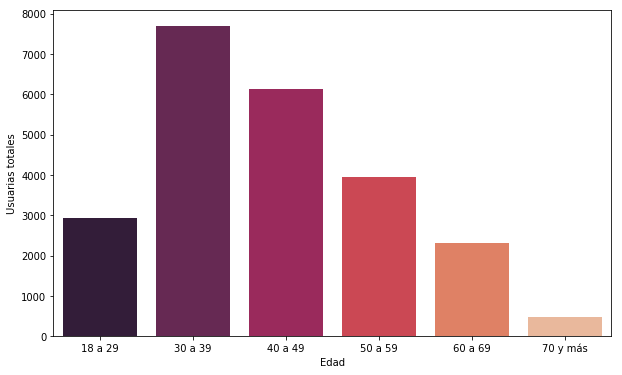

In [6]:
age_groups = ["18 a 29", "30 a 39", "40 a 49", "50 a 59", "60 a 69", "70 y más"]
group_length = [len(group1), len(group2), len(group3), len(group4), len(group5), len(group6)]

conjunto_edades = {'Edad':age_groups,'Usuarias totales':group_length}
df_edades = pd.DataFrame(conjunto_edades)

plt.figure(figsize=(10, 6))
sns.barplot(x='Edad', y='Usuarias totales', palette="rocket", data=df_edades)

Ahora, revisaremos cuántos departamentos y tipos de prenda hay

In [7]:
"En total hay " + str(len(df["Department Name"].unique())) + " departamentos y " + str(len(df["Class Name"].unique())) + " tipos distintos de prenda"

'En total hay 7 departamentos y 21 tipos distintos de prenda'

Ahora vamos a analizar las palabras más utilizadas. Para esto, utilizaremos la columna de opiniones escritas, por lo que necesitamos deshacernos de todas las filas que contengan valores nulos. Al tener solamente 3% de valores nulos, no afecta en gran medida el tamaño de la dataframe

In [8]:
df_clean = df[df['Review Text'].notna()]
(df_clean.isnull().sum()/len(df)) * 100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      12.628800
Review Text                 0.000000
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.055352
Department Name             0.055352
Class Name                  0.055352
dtype: float64

Para analizar las palabras más utilizadas, primero tenemos que quitar las palabras más comunes que se repiten frecuentemente en el idioma. Se importa una plataforma que descarga una lista con las palabras que más se repiten en el idioma inglés

In [128]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/karen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append("This")
stop.append("I")
stop.append("i'm")
stop.append("-")
stop.append("it.")
stop.append("on.")
stop.append("can't")
stop.append("another")
stop.append("however")

Obtenemos una lista con las 70 palabras más repetidas en las opiniones

In [130]:
from collections import Counter
common_words = Counter(" ".join(df_clean["Review Text"]).split()).most_common(200)

Hacemos un nuevo dataframe con la lista de palabras para poder utilizarla

In [131]:
opiniones = pd.DataFrame(common_words)

Removemos las palabras de la lista de más utilizadas de nuestro dataframe y regresamos la primera columna, que contiene las palabras en forma de texto

In [132]:
palabras_comunes1 = opiniones.apply(lambda x: [item for item in x if item not in stop])
palabras_comunes1[0]

['dress',
 'love',
 'size',
 'like',
 'wear',
 'fit',
 'top',
 'would',
 'great',
 'really',
 'fabric',
 'little',
 'ordered',
 'look',
 'color',
 'small',
 'one',
 'bought',
 'looks',
 'fits',
 'bit',
 'perfect',
 'nice',
 'much',
 'got',
 'soft',
 'material',
 'also',
 'think',
 'even',
 'back',
 'cute',
 'tried',
 'well',
 'usually',
 'length',
 'flattering',
 'me.',
 'shirt',
 'get',
 'beautiful',
 'could',
 'long',
 'petite',
 'sweater',
 'still',
 'large',
 'good',
 'colors',
 'comfortable',
 'medium',
 'runs',
 'true',
 'pretty',
 'retailer',
 'super',
 'quality',
 'xs',
 'work',
 'see',
 'wearing',
 'way',
 'made',
 'dress.',
 'waist',
 'cut',
 'purchased',
 'skirt',
 'right',
 'black',
 'jeans',
 'feel',
 'definitely',
 'short',
 'store',
 'looked',
 'enough',
 'sleeves',
 'go',
 'top.',
 'pants',
 'white',
 'going',
 'size.',
 'loved',
 'big',
 'worn',
 'many',
 'The',
 'design',
 'make',
 'try',
 'style',
 'Love',
 'around',
 'thought',
 'regular',
 'makes',
 'tight',
 'fron

## Análisis por edades

In [270]:
"La edad promedio de las usuarias del sitio es de " + str(df["Age"].mean())

'La edad promedio de las usuarias del sitio es de 43.198543813335604'

### Mujeres de 18 a 29 años

In [14]:
"Se trabajará con " + str(len(group1)) + " opiniones de mujeres de 18 a 29 años."

'Se trabajará con 2931 opiniones de mujeres de 18 a 29 años.'

In [15]:
group1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
29,29,4,28,Great layering piece,This sweater is so comfy and classic - it bala...,5,1,0,General,Tops,Sweaters
32,32,1060,21,Love these pants,These pants are even better in person. the onl...,5,1,0,General Petite,Bottoms,Pants
36,36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
42,42,910,23,Soft & lovely,This poncho is so cute i love the plaid check ...,5,1,0,General,Tops,Fine gauge


In [40]:
"La calificación media de este grupo de edad es de " + str(group1["Rating"].mean())

'La calificación media de este grupo de edad es de 4.201637666325486'

In [133]:
group1_clean = group1[group1['Review Text'].notna()]
common_words1 = Counter(" ".join(group1_clean["Review Text"]).split()).most_common(200)
opiniones1 = pd.DataFrame(common_words1)
review_words1 = opiniones1.apply(lambda x: [item for item in x if item not in stop])
review_words1 = review_words1[0]

In [151]:
group1["Recommended IND"].value_counts()/len(group1["Recommended IND"]) * 100

1    81.746844
0    18.253156
Name: Recommended IND, dtype: float64

### Mujeres de 30 a 39 años

In [32]:
"Se trabajará con " + str(len(group2)) + " opiniones de mujeres de 30 a 39 años."

'Se trabajará con 7702 opiniones de mujeres de 30 a 39 años.'

In [28]:
group2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [41]:
"La calificación media de este grupo de edad es de " + str(group2["Rating"].mean())

'La calificación media de este grupo de edad es de 4.17047520124643'

In [134]:
group2_clean = group2[group2['Review Text'].notna()]
common_words2 = Counter(" ".join(group2_clean["Review Text"]).split()).most_common(200)
opiniones2 = pd.DataFrame(common_words2)
review_words2 = opiniones2.apply(lambda x: [item for item in x if item not in stop])
review_words2 = review_words2[0]

In [152]:
group2["Recommended IND"].value_counts()/len(group2["Recommended IND"]) * 100

1    81.355492
0    18.644508
Name: Recommended IND, dtype: float64

### Mujeres de 40 a 49 años

In [35]:
"Se trabajará con " + str(len(group3)) + " opiniones de mujeres de 40 a 49 años."

'Se trabajará con 6127 opiniones de mujeres de 40 a 49 años.'

In [42]:
group3.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
13,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates
15,15,1065,47,"Nice, but not for my body",I took these out of the package and wanted the...,4,1,3,General,Bottoms,Pants
17,17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses


In [43]:
"La calificación media de este grupo de edad es de " + str(group3["Rating"].mean())

'La calificación media de este grupo de edad es de 4.158315652031989'

In [135]:
group3_clean = group3[group3['Review Text'].notna()]
common_words3 = Counter(" ".join(group3_clean["Review Text"]).split()).most_common(200)
opiniones3 = pd.DataFrame(common_words3)
review_words3 = opiniones3.apply(lambda x: [item for item in x if item not in stop])
review_words3 = review_words3[0]

In [19]:
(group3["Department Name"].value_counts()/len(group3["Department Name"])) * 100

Tops        45.340297
Dresses     26.244492
Bottoms     17.414722
Intimate     6.610087
Jackets      3.819161
Trend        0.505957
Name: Department Name, dtype: float64

In [153]:
group3["Recommended IND"].value_counts()/len(group3["Recommended IND"]) * 100

1    81.24694
0    18.75306
Name: Recommended IND, dtype: float64

### Mujeres de 50 a 59 años

In [36]:
"Se trabajará con " + str(len(group4)) + " opiniones de mujeres de 50 a 59 años."

'Se trabajará con 3948 opiniones de mujeres de 50 a 59 años.'

In [44]:
group4.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
12,12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses
14,14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses
21,21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses


In [66]:
"La calificación media de este grupo de edad es de " + str(group4["Rating"].mean())

'La calificación media de este grupo de edad es de 4.23581560283688'

In [136]:
group4_clean = group4[group4['Review Text'].notna()]
common_words4 = Counter(" ".join(group4_clean["Review Text"]).split()).most_common(200)
opiniones4 = pd.DataFrame(common_words4)
review_words4 = opiniones4.apply(lambda x: [item for item in x if item not in stop])
review_words4 = review_words4[0]

In [20]:
(group4["Department Name"].value_counts()/len(group4["Department Name"])) * 100

Tops        47.847011
Dresses     24.721378
Bottoms     16.337386
Intimate     5.800405
Jackets      4.609929
Trend        0.633232
Name: Department Name, dtype: float64

In [154]:
group4["Recommended IND"].value_counts()/len(group4["Recommended IND"]) * 100

1    83.763931
0    16.236069
Name: Recommended IND, dtype: float64

### Mujeres de 60 a 60 años

In [37]:
"Se trabajará con " + str(len(group5)) + " opiniones de mujeres de 60 a 69 años."

'Se trabajará con 2305 opiniones de mujeres de 60 a 69 años.'

In [46]:
group5.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
35,35,1060,65,Lovely!,Wouldn't have given them a second look but tri...,4,1,3,General Petite,Bottoms,Pants
43,43,89,67,Some things you should know...,"First, this is thermal ,so naturally i didn't ...",4,1,1,Initmates,Intimate,Sleep
54,54,862,66,Cute top,Nice top. armholes are a bit oversized but as ...,4,1,2,General,Tops,Knits
55,55,862,61,Soft and cute as can be!,This is an adorable top that i find to be extr...,5,1,2,General,Tops,Knits


In [47]:
"La calificación media de este grupo de edad es de " + str(group5["Rating"].mean())

'La calificación media de este grupo de edad es de 4.294577006507592'

In [138]:
group5_clean = group5[group5['Review Text'].notna()]
common_words5 = Counter(" ".join(group5_clean["Review Text"]).split()).most_common(200)
opiniones5 = pd.DataFrame(common_words5)
review_words5 = opiniones5.apply(lambda x: [item for item in x if item not in stop])
review_words5 = review_words5[0]

In [31]:
(group5["Department Name"].value_counts()/len(group5["Department Name"])) * 100

Tops        50.976139
Dresses     22.299349
Bottoms     14.837310
Intimate     5.900217
Jackets      5.509761
Trend        0.477223
Name: Department Name, dtype: float64

In [167]:
group5["Recommended IND"].value_counts()/len(group5["Recommended IND"]) * 100

1    85.596529
0    14.403471
Name: Recommended IND, dtype: float64

### Mujeres mayores de 70 años

In [38]:
"Se trabajará con " + str(len(group6)) + " opiniones de mujeres de 70 años o más."

'Se trabajará con 473 opiniones de mujeres de 70 años o más.'

In [48]:
group6.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
95,95,863,83,Casual elegance!,"Purchased this top online, and when i received...",5,1,14,General,Tops,Knits
126,126,1133,71,NaN,I read the previous reviews and had hoped that...,4,1,0,General,Jackets,Outerwear
211,211,1020,72,NaN,"Very pretty fabric and beautiful color, but i ...",4,1,5,General Petite,Bottoms,Skirts
234,234,840,83,Pretty but runs large!,I ordered this top in my usual size and am exc...,5,1,0,General,Tops,Blouses
277,277,868,83,Sooooooooo cute!,"Love this top!\nit is a full/ swing top, but t...",5,1,1,General,Tops,Knits


In [49]:
"La calificación media de este grupo de edad es de " + str(group6["Rating"].mean())

'La calificación media de este grupo de edad es de 4.25369978858351'

In [139]:
group6_clean = group6[group6['Review Text'].notna()]
common_words6 = Counter(" ".join(group6_clean["Review Text"]).split()).most_common(200)
opiniones6 = pd.DataFrame(common_words6)
review_words6 = opiniones6.apply(lambda x: [item for item in x if item not in stop])
review_words6 = review_words6[0]

In [156]:
group6["Recommended IND"].value_counts()/len(group6["Recommended IND"]) * 100

1    83.298097
0    16.701903
Name: Recommended IND, dtype: float64

In [22]:
(group6["Department Name"].value_counts()/len(group6["Department Name"])) * 100

Tops        50.951374
Dresses     22.621564
Bottoms     12.473573
Intimate     7.399577
Jackets      6.131078
Trend        0.422833
Name: Department Name, dtype: float64

### Información general de todos los grupos de edad

Compras por departamento

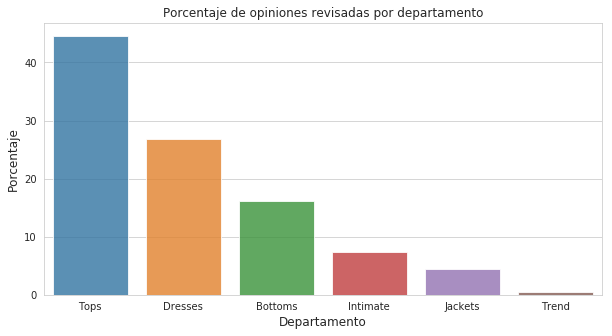

In [158]:
department_sales  = (df["Department Name"].value_counts()/len(df["Department Name"])) * 100
department_sales = department_sales[:10,]
plt.figure(figsize=(10,5))
sns.barplot(department_sales.index, department_sales.values, alpha=0.8)
plt.title('Porcentaje de opiniones revisadas por departamento')
plt.ylabel('Porcentaje', fontsize=12)
plt.xlabel('Departamento', fontsize=12)
plt.show()

In [140]:
group_ratings = [group1["Rating"].mean(), group2["Rating"].mean(), 
                group3["Rating"].mean(), group4["Rating"].mean(), 
                group5["Rating"].mean(), group6["Rating"].mean()]
group_ratings

[4.201637666325486,
 4.17047520124643,
 4.158315652031989,
 4.23581560283688,
 4.294577006507592,
 4.25369978858351]

In [52]:
conjunto_promedios = {'Edad':age_groups,'Promedios':group_ratings}
df_promedios = pd.DataFrame(conjunto_promedios)
df_promedios

,Edad,Promedios
0,18 a 29,4.201638
1,30 a 39,4.170475
2,40 a 49,4.158316
3,50 a 59,4.235816
4,60 a 69,4.294577
5,70 y más,4.253700


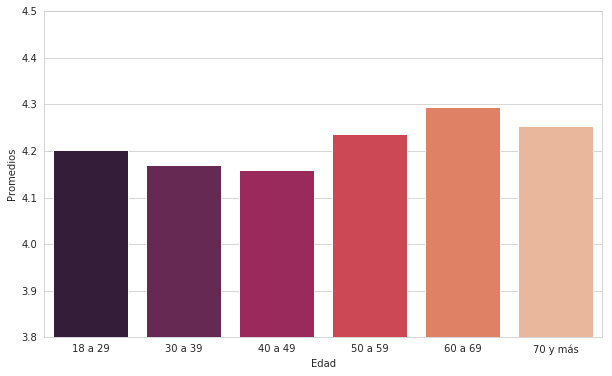

In [63]:
plt.figure(figsize=(10, 6))
plt.ylim(3.8, 4.5)
sns.set_style("whitegrid")
sns.barplot(x='Edad', y='Promedios', palette="rocket", data=df_promedios)

In [170]:
positive_reviews = [
    (group1["Recommended IND"].value_counts()/len(group1["Recommended IND"]) * 100)[1],
    (group2["Recommended IND"].value_counts()/len(group2["Recommended IND"]) * 100)[1],
    (group3["Recommended IND"].value_counts()/len(group3["Recommended IND"]) * 100)[1],
    (group4["Recommended IND"].value_counts()/len(group4["Recommended IND"]) * 100)[1],
    (group5["Recommended IND"].value_counts()/len(group5["Recommended IND"]) * 100)[1],
    (group6["Recommended IND"].value_counts()/len(group6["Recommended IND"]) * 100)[1]
]
positive_reviews

[81.7468440805186,
 81.35549207997923,
 81.24693977476743,
 83.76393110435664,
 85.59652928416486,
 83.29809725158562]

In [171]:
conjunto_positivo = {'Edad':age_groups,'Porcentaje de opiniones positivas':positive_reviews}
df_positivo = pd.DataFrame(conjunto_positivo)
df_positivo

,Edad,Porcentaje de opiniones positivas
0,18 a 29,81.746844
1,30 a 39,81.355492
2,40 a 49,81.246940
3,50 a 59,83.763931
4,60 a 69,85.596529
5,70 y más,83.298097


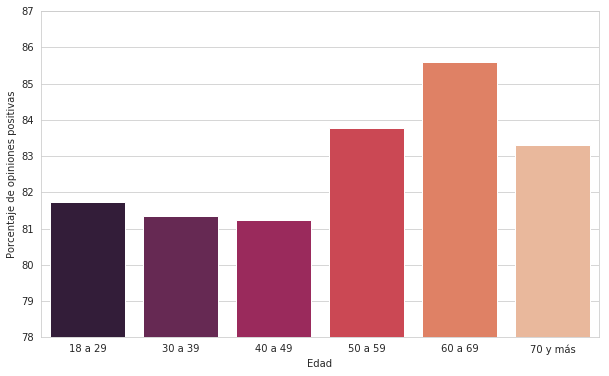

In [173]:
plt.figure(figsize=(10, 6))
plt.ylim(78, 87)
sns.set_style("whitegrid")
sns.barplot(x='Edad', y='Porcentaje de opiniones positivas', palette="rocket", data=df_positivo)

In [141]:
diff1 = list(set(review_words1) - set(review_words2) - set(review_words3)  - set(review_words4)  - set(review_words5)  - set(review_words6))
diff1

['loose', 'recommend']

In [142]:
diff2 = list(set(review_words2) - set(review_words1) - set(review_words3)  - set(review_words4)  - set(review_words5)  - set(review_words6))
diff2

['body', 'normally', 'since']

In [143]:
diff3 = list(set(review_words3) - set(review_words1) - set(review_words2)  - set(review_words4)  - set(review_words5)  - set(review_words6))
diff3

['bottom']

In [144]:
diff4 = list(set(review_words4) - set(review_words1) - set(review_words1)  - set(review_words3)  - set(review_words5)  - set(review_words6))
diff4

['perfect.']

In [145]:
diff5 = list(set(review_words5) - set(review_words1) - set(review_words2)  - set(review_words3)  - set(review_words4) - set(review_words6))
diff5

['lovely', 'may', 'weight']

In [147]:
diff6 = list(set(review_words6) - set(review_words1) - set(review_words2)  - set(review_words3)  - set(review_words4) - set(review_words5))
diff6

['pattern', 'fit.', 'unique', 'two', 'return', 'knit', 'received', '8']

## Análisis por clase de prenda

In [188]:
tops = df[(df['Department Name'] == "Tops")]
dresses = df[(df['Department Name'] == "Dresses")]
bottoms = df[(df['Department Name'] == "Bottoms")]
intimate = df[(df['Department Name'] == "Intimate")]
jackets = df[(df['Department Name'] == "Jackets")]
trends = df[(df['Department Name'] == "Trend")]

In [199]:
department_ratings = [tops["Rating"].mean(),
                      dresses["Rating"].mean(),
                      bottoms["Rating"].mean(),
                      intimate["Rating"].mean(),
                      jackets["Rating"].mean(),
                      trends["Rating"].mean()]
department_names = ["Tops", "Dresses", "Bottoms", "Intimate", "Jackets", "Trends"]
rating_departamentos = {'Departamentos':department_names,'Promedios':department_ratings}
df_departamentos_r = pd.DataFrame(rating_departamentos)
df_departamentos_r

,Departamentos,Promedios
0,Tops,4.172239
1,Dresses,4.150815
2,Bottoms,4.288760
3,Intimate,4.280115
4,Jackets,4.264535
5,Trends,3.815126


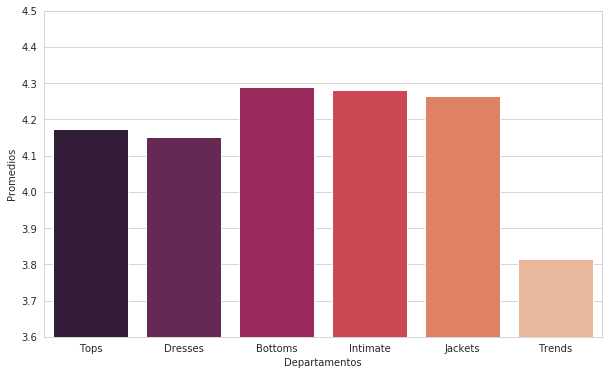

In [203]:
plt.figure(figsize=(10, 6))
plt.ylim(3.6, 4.5)
sns.set_style("whitegrid")
sns.barplot(x='Departamentos', y='Promedios', palette="rocket", data=df_departamentos_r)

### Tops

In [190]:
tops["Class Name"].value_counts()/len(tops["Class Name"]) * 100

Knits         46.264807
Blouses       29.585403
Sweaters      13.641574
Fine gauge    10.508216
Name: Class Name, dtype: float64

In [189]:
tops.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
17,17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses
20,20,847,33,"Cute, crisp shirt","If this product was in petite, i would get the...",4,1,2,General,Tops,Blouses


In [210]:
blouses = tops[(tops['Class Name'] == "Blouses")]
knits = tops[(tops['Class Name'] == "Knits")]
sweaters = tops[(tops['Class Name'] == "Sweaters")]
fine_gauge = tops[(tops['Class Name'] == "Fine gauge")]

In [217]:
tops_ratings =        [blouses["Rating"].mean(),
                      knits["Rating"].mean(),
                      sweaters["Rating"].mean(),
                      fine_gauge["Rating"].mean()]
tops_names = ["Blouses", "Knits", "Sweaters", "Fine gauge"]
rating_tops = {'Clases':tops_names,'Promedios':tops_ratings}
df_tops_r = pd.DataFrame(rating_tops)
df_tops_r

,Clases,Promedios
0,Blouses,4.154020
1,Knits,4.161677
2,Sweaters,4.179272
3,Fine gauge,4.260909


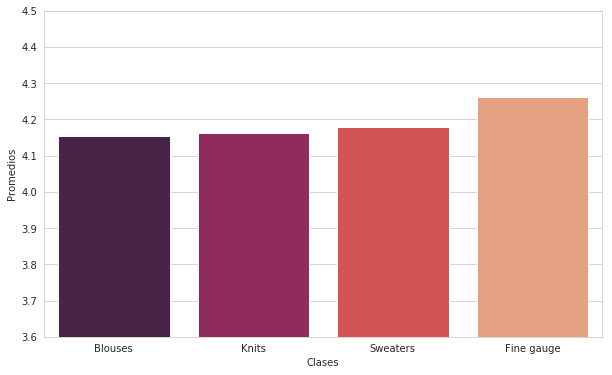

In [237]:
plt.figure(figsize=(10, 6))
plt.ylim(3.6, 4.5)
sns.set_style("whitegrid")
sns.barplot(x='Clases', y='Promedios', palette="rocket", data=df_tops_r)

### Dresses

In [218]:
dresses["Class Name"].value_counts()/len(dresses["Class Name"]) * 100

Dresses    100.0
Name: Class Name, dtype: float64

In [219]:
dresses["Rating"].mean()

4.150815002373793

In [249]:
dresses_ratings = [dresses["Rating"].mean()]
dress_names = ["Dresses"]
rating_dress = {'Clases':dress_names,'Promedios':dresses_ratings}
df_dress_r = pd.DataFrame(rating_dress)
df_dress_r

,Clases,Promedios
0,Dresses,4.150815


### Bottoms

In [192]:
bottoms["Class Name"].value_counts()/len(bottoms["Class Name"]) * 100

Pants             36.535931
Jeans             30.192156
Skirts            24.874967
Shorts             8.344301
Casual bottoms     0.052645
Name: Class Name, dtype: float64

In [212]:
pants = bottoms[(bottoms['Class Name'] == "Pants")]
jeans = bottoms[(bottoms['Class Name'] == "Jeans")]
skirts = bottoms[(bottoms['Class Name'] == "Skirts")]
shorts = bottoms[(bottoms['Class Name'] == "Shorts")]
casual_bottoms = bottoms[(bottoms['Class Name'] == "Casual bottoms")]

casual_bottoms.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4612,4612,54,27,NaN,NaN,5,1,0,General,Bottoms,Casual bottoms
12397,12397,45,26,"Cute pants, but short.",These pants have a really cute design. however...,4,1,0,General,Bottoms,Casual bottoms


In [222]:
bottoms_ratings =     [pants["Rating"].mean(),
                      jeans["Rating"].mean(),
                      skirts["Rating"].mean(),
                      shorts["Rating"].mean()]
bottoms_names = ["Pants", "Jeans", "Skirts", "Shorts"]
rating_bottoms = {'Clases':bottoms_names,'Promedios':bottoms_ratings}
df_bottoms_r = pd.DataFrame(rating_bottoms)
df_bottoms_r

,Clases,Promedios
0,Pants,4.265850
1,Jeans,4.360942
2,Skirts,4.245503
3,Shorts,4.255521


### Intimate

In [214]:
intimate["Class Name"].value_counts()/len(intimate["Class Name"]) * 100

Lounge       39.827089
Swim         20.172911
Sleep        13.141210
Legwear       9.510086
Intimates     8.876081
Layering      8.414986
Chemises      0.057637
Name: Class Name, dtype: float64

In [231]:
lounge = intimate[(intimate['Class Name'] == "Lounge")]
swim = intimate[(intimate['Class Name'] == "Swim")]
legwear = intimate[(intimate['Class Name'] == "Legwear")]
intimate_class = intimate[(intimate['Class Name'] == "Intimates")]
layering = intimate[(intimate['Class Name'] == "Layering")]

In [232]:
intimate_ratings =    [lounge["Rating"].mean(),
                      swim["Rating"].mean(),
                      legwear["Rating"].mean(),
                      intimate["Rating"].mean(),
                      layering["Rating"].mean()]
intimate_names = ["Lounge", "Swim", "Legwear", "Intimate", "Layering"]
rating_intimate = {'Clases':intimate_names,'Promedios':intimate_ratings}
df_intimate_r = pd.DataFrame(rating_intimate)
df_intimate_r

,Clases,Promedios
0,Lounge,4.301013
1,Swim,4.197143
2,Legwear,4.278788
3,Intimate,4.280115
4,Layering,4.376712


### Jackets

In [194]:
jackets["Class Name"].value_counts()/len(jackets["Class Name"]) * 100

Jackets      68.217054
Outerwear    31.782946
Name: Class Name, dtype: float64

In [216]:
jacket_class = jackets[(jackets['Class Name'] == "Jackets")]
outerwear = jackets[(jackets['Class Name'] == "Outerwear")]

outerwear.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
18,18,1120,32,Super cute and cozy,"A flattering, super cozy coat. will work well...",5,1,0,General,Jackets,Outerwear
82,82,1133,33,Cute parka!,The rest of the reviewers are right about the ...,5,1,0,General,Jackets,Outerwear
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
126,126,1133,71,NaN,I read the previous reviews and had hoped that...,4,1,0,General,Jackets,Outerwear
127,127,1133,30,NaN,This coat is beautiful! i love the color and t...,5,1,0,General,Jackets,Outerwear


In [233]:
jacket_ratings =    [jacket_class["Rating"].mean(),
                      outerwear["Rating"].mean()]
jacket_names = ["Jackets", "Outerwear"]
rating_jacket = {'Clases':jacket_names,'Promedios':jacket_ratings}
df_jacket_r = pd.DataFrame(rating_jacket)
df_jacket_r

,Clases,Promedios
0,Jackets,4.295455
1,Outerwear,4.198171


### Trend

In [195]:
trends["Class Name"].value_counts()/len(trends["Class Name"]) * 100

Trend    100.0
Name: Class Name, dtype: float64

In [235]:
trends["Rating"].mean()

3.8151260504201683

In [250]:
trends_ratings = [trends["Rating"].mean()]
trend_names = ["trends"]
rating_trend = {'Clases':trend_names,'Promedios':trends_ratings}
df_trend_r = pd.DataFrame(rating_trend)
df_trend_r

,Clases,Promedios
0,trends,3.815126


### General

In [277]:
class_ratings = pd.DataFrame()
rating_classes = class_ratings.append([df_tops_r,
                                       df_dress_r,
                                       df_bottoms_r,
                                       df_intimate_r,
                                       df_jacket_r,
                                       df_trend_r])
rating_classes = rating_classes.sort_values(by=["Promedios"], ascending=False)

In [279]:
rating_classes

,Clases,Promedios
4,Layering,4.376712
1,Jeans,4.360942
0,Lounge,4.301013
0,Jackets,4.295455
3,Intimate,4.280115
2,Legwear,4.278788
0,Pants,4.265850
3,Fine gauge,4.260909
3,Shorts,4.255521
2,Skirts,4.245503


Text(0.5, 0, 'Promedios por clase')

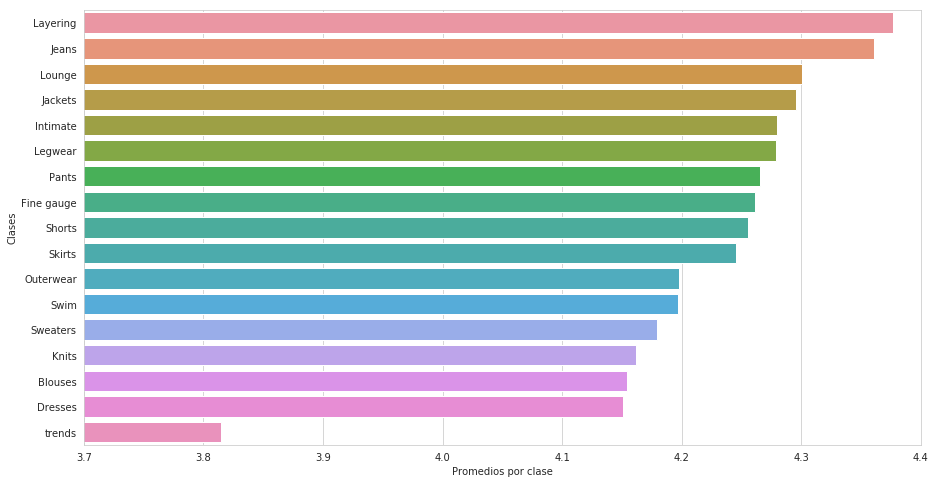

In [291]:
plt.figure(figsize=(15, 8))
plt.xlim(3.7, 4.4)
al = sns.barplot(x='Promedios', y='Clases', data=rating_classes)
al.set_xlabel('Promedios por clase')